In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

# 1. Using dock data to calculate the daily bike occupation ratio and  percent empty (percentage of time the station had no bikes available)

In [2]:
# Aggregating data

a = ['04', '05', '06','07', '08', '09']

alldock = pd.DataFrame()
for num in a:
     # Read in data and select the first 13 columns
    df = pd.read_csv("dockdata/TheOpenBus/2016-{}/bikeshare_nyc_raw.csv".format(num), sep="\t", error_bad_lines=False).iloc[:, :13]
    # Filter out the stations not in use
    dock = df.loc[df['in_service'] == 1]
    dock = dock.drop('in_service', 1)
    dock = dock.drop('status_key', 1)
    
    # construct 24 hour time
    df0 = dock[dock.pm == 1]
    df1 = dock[dock.pm == 0]
    # am change to 24 hour time
    df10 = df1[df1.hour != 12]
    # keep 12am to 0 at midnight
    df11 = df1[df1.hour == 12]
    df11['hour'] = 0
    # pm change to 24 hour time
    df00 = df0[df0.hour != 12]
    df00['hour'] = df00['hour'] + 12
    # keep 12 pm as the same (at about noon)
    df01 = df0[df0.hour == 12]
    dock = df10.append([df11,df00,df01])
    dock = dock.drop('pm', 1)
    
    #dock = dock.drop(dock[dock.in_service = 0].index)
    dock['time'] = "20" + dock['date'] + " " + dock['hour'].astype(str) + ":" \
                + dock['minute'].astype(str)
    dock['time']=dock['time'].map(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M'))
    dock = dock.sort_index()
    dock['bike occupation ratio'] = dock['avail_bikes'] / (dock['avail_bikes'] + dock['avail_docks'])
    #dock['quarter']= dock.time.dt.quarter
    #dock['month'] = dock.time.dt.month
    #dock['day']= dock.time.dt.day
    #dock['hour']= dock.time.dt.hour
    #dock['week']= dock.time.dt.week
    #dock['dayofweek']= dock.time.dt.dayofweek
    #dock['weekday_name']= dock.time.dt.weekday_name
    
    alldock = alldock.append(dock, ignore_index=True)
    print('This is month {}, the data number of the month is {}, the total numbe is {}'.format(num, len(dock), len(alldock)))

# Sort the data 
alldock = alldock.sort_values(by=['dock_id', 'time'], ascending=[True, True])

alldock.to_csv('Results/Dock_data.csv', index= False, sep=',')

alldock.head()

/Users/jiepeng/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jiepeng/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


This is month 04, the data number of the month is 1069908, the total numbe is 1069908
This is month 05, the data number of the month is 565336, the total numbe is 1635244
This is month 06, the data number of the month is 1061057, the total numbe is 2696301


b'Skipping line 646269: expected 14 fields, saw 12914\n'


This is month 07, the data number of the month is 640839, the total numbe is 3337140


b'Skipping line 586070: expected 32 fields, saw 34772\n'


This is month 08, the data number of the month is 643205, the total numbe is 3980345


b'Skipping line 551468: expected 50 fields, saw 22370\nSkipping line 551473: expected 50 fields, saw 98\n'


This is month 09, the data number of the month is 678909, the total numbe is 4659254


,dock_id,dock_name,date,hour,minute,avail_bikes,avail_docks,tot_docks,_lat,_long,time,bike occupation ratio
0,72,W 52 St & 11 Ave,16-04-01,3,24,15.0,24,39.0,40.767272,-73.993929,2016-04-01 03:24:00,0.384615
1,72,W 52 St & 11 Ave,16-04-01,3,45,15.0,24,39.0,40.767272,-73.993929,2016-04-01 03:45:00,0.384615
2,72,W 52 St & 11 Ave,16-04-01,3,56,15.0,24,39.0,40.767272,-73.993929,2016-04-01 03:56:00,0.384615
3,72,W 52 St & 11 Ave,16-04-01,4,7,15.0,24,39.0,40.767272,-73.993929,2016-04-01 04:07:00,0.384615
4,72,W 52 St & 11 Ave,16-04-01,4,22,15.0,24,39.0,40.767272,-73.993929,2016-04-01 04:22:00,0.384615


In [3]:
# Take the station information into a indivisual file
station_info = alldock[['dock_id', 'dock_name', '_lat', '_long']].drop_duplicates()
station_info = station_info.dropna(axis=0, how='any')
station_info = station_info.loc[station_info['_lat'] > 40]
station_info.loc[station_info['_long'] > 40, '_long']= -73.977885
# Set new column names
cols = ['station id','station name','station latitude','station longitude']
station_info.columns = cols

station_info.to_csv('Results/station_names.csv', index= False, sep=',')

# Later have visual inspection in excel

In [4]:
# bike occupation ratio each day
bike_occupation_ratio  = alldock.groupby(['dock_id', 'date'])['bike occupation ratio'].mean().reset_index()
bike_occupation_ratio.to_csv('Results/bike_occupation_ratio_each_day.csv', index= False, sep=',')  

# bike occupation ratio daily at each station
bike_occupation_ratio_station = bike_occupation_ratio.groupby(['dock_id'])['bike occupation ratio'].mean().reset_index()
cols = ['station id','daily bike occupation ratio']
bike_occupation_ratio_station.columns = cols
bike_occupation_ratio_station.to_csv('Results/bike_occupation_ratio_station_perday_station.csv', index= False, sep=',')


In [23]:
# Calculate timespan that station have no bike

# Calculalte timespan between each datapoints
alldock['time2'] = alldock.time
alldock['timedelta'] = (alldock['time']-alldock['time2'].shift()).fillna(0)
alldock.loc[alldock['timedelta'] < pd.Timedelta(0), 'timedelta'] = 0
alldock['timedelta_seconds'] = alldock['timedelta'].apply(lambda row: row.total_seconds())

# Calculate percentage for the timespan over 24 hours
alldock['empty rate'] = np.nan
alldock['empty rate'] = alldock['timedelta_seconds'] / (24*60*60)
# Filter out the percentage for the timespan over 24 hours when the station is not empty with bikes
alldock.loc[alldock['avail_bikes'] > 0, 'empty rate'] = 0
alldock.to_csv('Results/dock_data_percent_empty.csv', index= False, sep=',')

# Percent empty at each day
Percent_empty = alldock.groupby(['dock_id', 'date'])['empty rate'].sum().reset_index()
Percent_empty.to_csv('Results/dock_data_percent_empty_each_day.csv', index= False, sep=',')

# Percent empty perday by station
Percent_empty_station = Percent_empty.groupby(['dock_id'])['empty rate'].mean().reset_index()
Percent_empty_station.to_csv('Results/dock_data_percent_empty_perday_station.csv', index= False, sep=',')

In [22]:
Percent_empty_station.head()

,station id,daily bike occupation ratio
0,72,0.074340
1,79,0.252935
2,82,0.077839
3,83,0.000904
4,116,0.070755


bike_availability_hour = pd.read_csv('bike_availibility_by_hour.csv', sep=',')

bike_availability_hour.loc[bike_availability_hour['bike_available_rate'] < 0.2, 'status'] = 'Less Bike'
bike_availability_hour.loc[bike_availability_hour['bike_available_rate'] > 0.8, 'status'] = 'Less Dock'
bike_availability_hour.loc[(bike_availability_hour['bike_available_rate'] >= 0.2) &  (bike_availability_hour['bike_available_rate'] <= 0.8), 'status'] = 'Balanced'
bike_availability_hour

hourly = bike_availability_hour.groupby(['dock_id','hour'])['bike_available_rate'].mean().reset_index()

hourly_pivot= hourly.pivot(index='dock_id', columns='hour', values='bike_available_rate')

plt.figure(figsize = (15, 30))
sns.heatmap(hourly_pivot, cmap='RdYlGn_r')

# 2. Use Trip data to calculate the Parking time, Daily parking counts, Daily rides counts

In [ ]:
b = [ '201604', '201605', '201606','201607', '201608', '201609']

for num in b:
    df = pd.read_csv("tripdata/{}-citibike-tripdata.csv".format(num))
    # Remove unnecessary columns
    df.drop(['usertype', 'birth year', 'gender', 'start station name', 'start station latitude',
            'start station longitude', 'end station name', 'end station latitude', 'end station latitude'], 1)   
    df['starttime'] = pd.to_datetime(df.starttime)
    df['stoptime'] = pd.to_datetime(df.stoptime)
    df.to_csv('Results/trips_{}.csv'.format(num), index= False, sep=',')
    print('This is month {}, the data number of the month is {}'.format(num, len(df)))
    

In [9]:
b = [ '201604', '201605', '201606','201607', '201608', '201609']
alltrip= pd.DataFrame()
for num in b:
    df = pd.read_csv('Results/trips_{}.csv'.format(num), sep=',')
    alltrip = alltrip.append(df)
    print('This is month {}'.format(num))
alltrip.to_csv('Results/All_trips_2016_summer.csv', index= False, sep=',')

alltrip['starttime'] = pd.to_datetime(alltrip.starttime)
alltrip['stoptime'] = pd.to_datetime(alltrip.stoptime)

This is month 201604
This is month 201605
This is month 201606
This is month 201607
This is month 201608
This is month 201609


### Calculate the Parking time ( Median parking time for a bike in the station)

In [10]:
# Isolate the bike parking start time
ended_station=alltrip[['end station id', 'bikeid', 'stoptime']]
cols1 = ['station id', 'bikeid', 'stoptime']
ended_station.columns = cols1

# Isolate the bike parking end time
start_station =alltrip[['start station id', 'bikeid', 'starttime']]
cols2 = ['station id', 'bikeid', 'starttime']
start_station.columns = cols2
# create a new dataframe with each biks stoptime and starttime lined up at each station (contain duplicates)
station_trip = pd.merge(ended_station, start_station, how='left', on = ['station id','bikeid'])
station_trip.head()

,station id,bikeid,stoptime,starttime
0,236,19704,2016-04-01 00:08:42,2016-04-01 00:56:10
1,236,19704,2016-04-01 00:08:42,2016-05-13 07:48:06
2,236,19704,2016-04-01 00:08:42,2016-06-05 02:30:11
3,236,19704,2016-04-01 00:08:42,2016-06-22 10:18:11
4,236,19704,2016-04-01 00:08:42,2016-08-07 22:53:41


In [11]:
# Calculate the difference between stoptime and starttime
station_trip['TimeDiff'] = station_trip['starttime'] - station_trip['stoptime']
# remove null
station_trip = station_trip[station_trip.TimeDiff.notnull()]
# remove the time starttime earlier than stoptime data
station_trip = station_trip.drop(station_trip[station_trip['TimeDiff'] < pd.Timedelta(0)].index)

# The smallest time interval would be the parking time for a bike parked at a specific time
station_trip = station_trip.groupby(['station id', 'bikeid', 'stoptime'])['TimeDiff'].min().reset_index()
# Create a column have the time difference changed to seconds
station_trip['TimeDiff_convert'] = station_trip['TimeDiff'].apply(lambda row: row.total_seconds())
station_trip.to_csv('Results/station_bike_parking_time_each_bike.csv', index = False, sep = ',')


In [36]:
# Calculate the median time for parking
station_trip_median = station_trip.groupby(['station id'])['TimeDiff_convert'].median().reset_index()
cols3 = ['station id', 'parking time']
station_trip_median.columns = cols3
station_trip_median.to_csv('Results/station_bike_parking_time_median.csv', index = False, sep = ',')
station_trip_median.head()

,station id,parking time
0,72,1263.5
1,79,3613.0
2,82,4086.0
3,83,11965.0
4,116,989.0


## Calculate the Daily rides counts and hourly rides rate 

In [13]:
alltrip.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,496,2016-04-01 00:00:26,2016-04-01 00:08:42,254,W 11 St & 6 Ave,40.735324,-73.998004,236,St Marks Pl & 2 Ave,40.728419,-73.987140,19704,Subscriber,1984.0,1
1,104,2016-04-01 00:00:27,2016-04-01 00:02:12,311,Norfolk St & Broome St,40.717227,-73.988021,350,Clinton St & Grand St,40.715595,-73.987030,21555,Subscriber,1970.0,1
2,128,2016-04-01 00:00:30,2016-04-01 00:02:38,3064,Myrtle Ave & Lewis Ave,40.696820,-73.937569,3059,Pulaski St & Marcus Garvey Blvd,40.693398,-73.939877,17430,Subscriber,1986.0,1
3,1197,2016-04-01 00:00:34,2016-04-01 00:20:31,3156,E 72 St & York Ave,40.766638,-73.953483,490,8 Ave & W 33 St,40.751551,-73.993934,17413,Subscriber,1981.0,1
4,419,2016-04-01 00:00:46,2016-04-01 00:07:46,116,W 17 St & 8 Ave,40.741776,-74.001497,405,Washington St & Gansevoort St,40.739323,-74.008119,16714,Subscriber,1982.0,2


In [14]:
alltrip['date'] = alltrip.starttime.dt.date

In [37]:
# Calculate number of rides each day
station_usage = alltrip.groupby(['start station id', 'date'])['tripduration'].count().reset_index()
# Average daily rides
station_usage = station_usage.groupby(['start station id'])['tripduration'].mean().reset_index()

cols4 = ['station id', 'rides_counts_daily']
station_usage.columns = cols4

station_usage.to_csv('Results/station_daily_rides_counts.csv', index = False, sep = ',')

In [38]:
cols4 = ['station id', 'percent empty']
Percent_empty_station.columns = cols4

rides_rate = pd.merge(Percent_empty_station, station_usage, how='inner', on=['station id'])

rides_rate['hourly_rides_rate'] = rides_rate['rides_counts_daily']/(24*(1-rides_rate['percent empty']))
rides_rate.to_csv('Results/station_daily_rides_counts.csv', index = False, sep = ',')
rides_rate.head()

,station id,percent empty,rides_counts_daily,hourly_rides_rate
0,72,0.074340,117.054645,5.268975
1,79,0.252935,92.540984,5.161364
2,82,0.077839,38.333333,1.732043
3,83,0.000904,44.896175,1.872367
4,116,0.070755,193.404372,8.672108


## Calculate the Daily parking counts

In [39]:
# Calculate number of parking each day
station_parking = alltrip.groupby(['end station id', 'date'])['tripduration'].count().reset_index()
# Average daily parking
station_parking = station_parking.groupby(['end station id'])['tripduration'].mean().reset_index()

cols5 = ['station id', 'parking_counts_daily']
station_parking.columns = cols5

station_parking.to_csv('Results/station_daily_parking_counts.csv', index = False, sep = ',')

# 3. use daily bike occupation ratio  and Parking time to find unbalanced stations

In [87]:
# load cleaned station info
station_info = pd.read_csv('Results/station_names_clean.csv', sep = ',')
station_info.head()

,station id,station name,station latitude,station longitude
0,72,W 52 St & 11 Ave,40.767272,-73.993929
1,79,Franklin St & W Broadway,40.719116,-74.006667
2,82,St James Pl & Pearl St,40.711174,-74.000165
3,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323
4,116,W 17 St & 8 Ave,40.741776,-74.001497


In [88]:
# daily bike occupation ratio
bike_occupation_ratio_station.head()

,station id,daily bike occupation ratio
0,72,0.311354
1,79,0.308189
2,82,0.328683
3,83,0.492496
4,116,0.361963


In [89]:
# Parking time
station_trip_median.head()

,station id,parking time
0,72,1263.5
1,79,3613.0
2,82,4086.0
3,83,11965.0
4,116,989.0


In [90]:
station_identif = pd.merge(bike_occupation_ratio_station, station_trip_median, how='inner', on=['station id'])
station_identif = pd.merge(station_info, station_identif, how='inner', on=['station id'])

# 'daily bike occupation ratio'
station_identif['DBOR_Norm'] = (station_identif['daily bike occupation ratio'] - station_identif['daily bike occupation ratio'].mean())\
                                / (station_identif['daily bike occupation ratio'].std())

# normalize 'log(Parking Time)'
station_identif['PT_Norm'] = (np.log(station_identif['parking time']) - np.log(station_identif['parking time']).mean())\
                                / (np.log(station_identif['parking time']).std())
    
station_identif.head()

,station id,station name,station latitude,station longitude,daily bike occupation ratio,parking time,DBOR_Norm,PT_Norm
0,72,W 52 St & 11 Ave,40.767272,-73.993929,0.311354,1263.5,-0.431020,-1.049289
1,79,Franklin St & W Broadway,40.719116,-74.006667,0.308189,3613.0,-0.449950,-0.157958
2,82,St James Pl & Pearl St,40.711174,-74.000165,0.328683,4086.0,-0.327360,-0.053586
3,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,0.492496,11965.0,0.652544,0.857907
4,116,W 17 St & 8 Ave,40.741776,-74.001497,0.361963,989.0,-0.128286,-1.257092


In [91]:
# Classifying stations
station_identif['Station_type'] = 'Balanced'
station_identif.loc[(station_identif['DBOR_Norm'] > 1) & (station_identif['PT_Norm'] > 1), 'Station_type']= 'LowDemand&HighSupply'
station_identif.loc[(station_identif['DBOR_Norm'] < -1 ) & (station_identif['PT_Norm'] < -1), 'Station_type']= 'HighDemand&LowSupply'

station_identif.to_csv('Results/Idenfifying_stations.csv', index=False, sep=',')

In [92]:
station_identif.head()

,station id,station name,station latitude,station longitude,daily bike occupation ratio,parking time,DBOR_Norm,PT_Norm,Station_type
0,72,W 52 St & 11 Ave,40.767272,-73.993929,0.311354,1263.5,-0.431020,-1.049289,Balanced
1,79,Franklin St & W Broadway,40.719116,-74.006667,0.308189,3613.0,-0.449950,-0.157958,Balanced
2,82,St James Pl & Pearl St,40.711174,-74.000165,0.328683,4086.0,-0.327360,-0.053586,Balanced
3,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,0.492496,11965.0,0.652544,0.857907,Balanced
4,116,W 17 St & 8 Ave,40.741776,-74.001497,0.361963,989.0,-0.128286,-1.257092,Balanced


# 4.How to balance

In [93]:
HighDemand_LowSupply = station_identif.loc[station_identif['Station_type'] == 'HighDemand&LowSupply']
HighDemand_LowSupply = HighDemand_LowSupply.drop(['daily bike occupation ratio', 
                                               'parking time', 'DBOR_Norm', 'PT_Norm'], 1)

LowDemand_HighSupply = station_identif.loc[station_identif['Station_type'] == 'LowDemand&HighSupply']
LowDemand_HighSupply = LowDemand_HighSupply.drop(['daily bike occupation ratio', 
                                               'parking time', 'DBOR_Norm', 'PT_Norm'], 1)

In [94]:
print(Percent_empty_station.head()) #Empty rate

print(rides_rate.head()) # hourly rides rate

print(station_parking.head()) #daily parking rate

   station id  percent empty
0          72       0.074340
1          79       0.252935
2          82       0.077839
3          83       0.000904
4         116       0.070755
   station id  percent empty  rides_counts_daily  hourly_rides_rate
0          72       0.074340          117.054645           5.268975
1          79       0.252935           92.540984           5.161364
2          82       0.077839           38.333333           1.732043
3          83       0.000904           44.896175           1.872367
4         116       0.070755          193.404372           8.672108
   station id  parking_counts_daily
0          72            116.535519
1          79             93.224044
2          82             38.316940
3          83             47.311475
4         116            195.267760


In [95]:
HighDemand_LowSupply = pd.merge(HighDemand_LowSupply, Percent_empty_station, how='left', on = ['station id'])
HighDemand_LowSupply = pd.merge(HighDemand_LowSupply, rides_rate, how='left', on = ['station id'])
HighDemand_LowSupply = pd.merge(HighDemand_LowSupply, station_parking, how='left', on = ['station id'])


LowDemand_HighSupply = pd.merge(LowDemand_HighSupply, Percent_empty_station, how='left', on = ['station id'])
LowDemand_HighSupply = pd.merge(LowDemand_HighSupply, rides_rate, how='left', on = ['station id'])
LowDemand_HighSupply = pd.merge(LowDemand_HighSupply, station_parking, how='left', on = ['station id'])


   station id        station name  station latitude  station longitude  \
0         153     E 40 St & 5 Ave         40.752062         -73.981632   
1         160     E 35 St & 3 Ave         40.746524         -73.977885   
2         167     E 39 St & 3 Ave         40.748901         -73.976049   
3         267  Broadway & W 36 St         40.750977         -73.987654   
4         357  E 11 St & Broadway         40.732618         -73.991580   

           Station_type  percent empty_x  percent empty_y  rides_counts_daily  \
0  HighDemand&LowSupply         0.308587         0.308587          158.306011   
1  HighDemand&LowSupply         0.252921         0.252921           48.058824   
2  HighDemand&LowSupply         0.265055         0.265055          163.229508   
3  HighDemand&LowSupply         0.540579         0.540579           78.633880   
4  HighDemand&LowSupply         0.308722         0.308722           93.808743   

   hourly_rides_rate  parking_counts_daily  
0           9.540001   

In [96]:
print("Stations lack bikes has {}".format(len(HighDemand_LowSupply)))
print("Stations lack rides has {}".format(len(LowDemand_HighSupply)))                                       

Stations lack bikes has 50
Stations lack rides has 34


In [132]:
HighDemand_hourly_rides_rate = HighDemand_LowSupply['hourly_rides_rate'].mean()
HighDemand_percent_empty = HighDemand_LowSupply['percent empty_x'].mean()
HighDemand_parking_rate = HighDemand_LowSupply['parking_counts_daily'].mean()
print('HighDemand')
print(HighDemand_hourly_rides_rate)
print(HighDemand_percent_empty)
print(HighDemand_parking_rate)

LowDemand_hourly_rides_rate = LowDemand_HighSupply['hourly_rides_rate'].mean()
LowDemand_percent_empty = LowDemand_HighSupply['percent empty_x'].mean()
LowDemand_parking_rate = LowDemand_HighSupply['parking_counts_daily'].mean()
LowDemand_rides_counts_daily = LowDemand_HighSupply['rides_counts_daily'].mean()
print('LowDemand')
print(LowDemand_hourly_rides_rate)
print(LowDemand_percent_empty)
print(LowDemand_parking_rate)

HighDemand
8.494158014601581
0.30466969660069815
135.36781566806988
LowDemand
0.7856349347184104
0.00940423404848057
20.70412419642314


In [194]:
b = [1,10,20,30,50,60, 70, 80, 90, 100,110, 120, 150]

y = []

emptytime = HighDemand_percent_empty

for x in b:
    emptytime = HighDemand_percent_empty
    t1 = ((1 - emptytime)*24/HighDemand_parking_rate)*x/50
    if t1 > emptytime:
        x = x - 1
        t1 = ((1 - emptytime)*24/HighDemand_parking_rate)*x/50
    else:
        y1 = HighDemand_hourly_rides_rate * ((1 - emptytime)*24/HighDemand_parking_rate)*x

    y.append(y1)

In [195]:
b = [1,10,20,30,50,60, 70, 80, 90, 100,110, 120, 150]

z = []

emptytime = LowDemand_percent_empty

for x in b:
    emptytime = LowDemand_percent_empty
    y1 = LowDemand_rides_counts_daily - LowDemand_hourly_rides_rate * ((1 - emptytime)*24/LowDemand_parking_rate)*(x/34)

    z.append(y1)
    

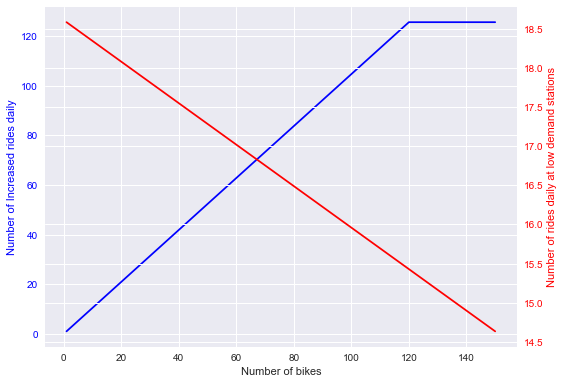

In [196]:
fig, ax1 = plt.subplots()
t = b
s1 = y
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('Number of bikes')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Number of Increased rides daily', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = z
ax2.plot(t, s2, 'r-')
ax2.set_ylabel('Number of rides daily at low demand stations', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [197]:
demand_supply = pd.DataFrame(
    {'bike_number': b,
     'Increase Daily Rides': y,
     'Decreas Daily Rides': z
    })
demand_supply.to_csv('Results/demand_supply_analysis.csv', index = False, sep=',')

In [198]:
y2 = LowDemand_rides_counts_daily - LowDemand_hourly_rides_rate * ((1 - emptytime)*24/LowDemand_parking_rate)*(70/34)

y1 = HighDemand_hourly_rides_rate * ((1 - emptytime)*24/HighDemand_parking_rate)*70
print('By taking 70 bikes from 34 "low demand and high supply" stations to 50 "high demand and low supply" stations')
print('increase rides daily per station in 50 "high demand and low supply" stations is {}'.format(y1))
print('Only decrease rides daily per station in 34 "low demand and high supply" stations to {}'.format(y2))

By taking 70 bikes from 34 "low demand and high supply" stations to 50 "high demand and low supply" stations
increase rides daily per station in 50 "high demand and low supply" stations is 104.42648594677246
Only decrease rides daily per station in 34 "low demand and high supply" stations to 16.755854674864356
